<a href="https://colab.research.google.com/github/UsmanCh1226/DS101_P2/blob/main/Copy_of_project2_(UC_2_7_26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2

This project uses the American Community Survey (ACS) data set introduced in lab.


For any question requiring to "find", "calculate", or "demonstrate," print out the results so that they will be available during the quiz.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
acs_url = "https://github.com/UM-Data-Science-101/data/raw/refs/heads/main/Old/pums_short.csv.gz"
acs = pd.read_csv(acs_url)

## Part 1

### Q1.a

Find the number of rows and columns for the `acs` table:

In [3]:
# solution
acs.shape

(276632, 31)

Find the names of the columns of the `acs` table:

In [4]:
# solution
acs.columns

Index(['DIVISION', 'PUMA', 'REGION', 'ST', 'NP', 'MRGP', 'RNTP', 'TEN', 'VALP',
       'VEH', 'YBL', 'FES', 'FINCP', 'FPARC', 'HHT', 'HINCP', 'HUPAC', 'MV',
       'NOC', 'NPF', 'NR', 'NRC', 'PARTNER', 'R18', 'R60', 'R65', 'TAXAMT',
       'WIF', 'WKEXREL', 'WORKSTAT', 'FFINCP'],
      dtype='object')

### Q1.b

Using the codebook, investigate the `"R65"` column.

* What information is contained in this column?
* What kind of data is this (quantitative (continuous, discrete) or categorical (nominal, ordinal, binary))?
* Produce a plot that shows the distribution of `"R65"` or its key features.
* Calculate and print out the exact distribution of `"R65"`.

In [5]:
# calculations
acs["R65"]
# This column indicates if a person's age is greater than 65, 0 if no, 1 if yes
# This column is a indicator variable
# Categorical Data (Binary because of the output values are 0 or 1)

,R65
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
276627,2.0
276628,0.0
276629,0.0
276630,1.0


In [6]:
# Distribution plot
distribution = acs["R65"].value_counts(normalize=True)
distribution

,proportion
R65,
0.0,0.652720
1.0,0.217067
2.0,0.130213


<Axes: xlabel='R65', ylabel='count'>

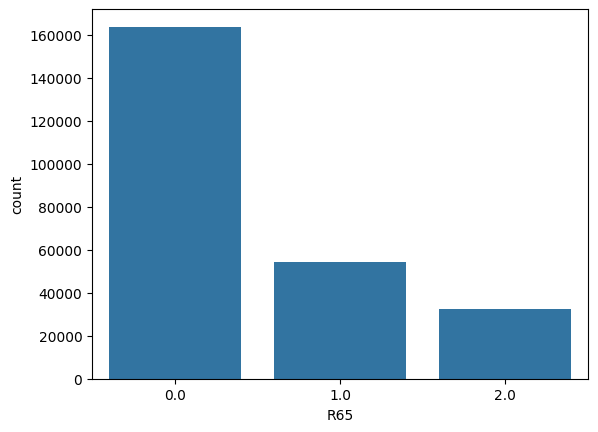

In [7]:
sb.countplot(data = acs, x = "R65")

In [8]:
counts = acs["R65"].value_counts().sort_index()

percentage_dist = acs['R65'].value_counts(normalize=True).sort_index() * 100


print("Frequency")
print(counts)

print("Percentage Distribution")
print(percentage_dist)

Frequency
R65
0.0    163845
1.0     54488
2.0     32686
Name: count, dtype: int64
Percentage Distribution
R65
0.0    65.271952
1.0    21.706723
2.0    13.021325
Name: proportion, dtype: float64


### Q1.c

Using the codebook, investigate the `"VALP"` column.

* What information is contained in this column?
* What kind of data is this (quantitative (continuous, discrete) or categorical (nominal, ordinal, binary))?
* Produce a plot that shows the distribution of `"VALP"` or its key features.
* Using numerical summaries, compute the proportion of households that are have less than 50,000 in property value, less than 100,000 in property value, and less than 200,000 in property value.
* Compute the 0.1, 0.5, and 0.75 quantiles of `"VALP"`.

In [9]:
# Information in this column relates to the property value of a house in the dataset
# For missing values, bbbbbbb is used or NaN
# The kind of data in this is Quantiative Discrete because the value of a property is finite and rounded to whole numbers.

In [10]:
# calculations
distribution_valp = acs["VALP"].value_counts(normalize=True)
distribution_valp

,proportion
VALP,
200000.0,0.042204
150000.0,0.037611
250000.0,0.037511
300000.0,0.036857
100000.0,0.027644
...,...
728000.0,0.000006
786000.0,0.000006
15700.0,0.000006


<Axes: xlabel='VALP', ylabel='Density'>

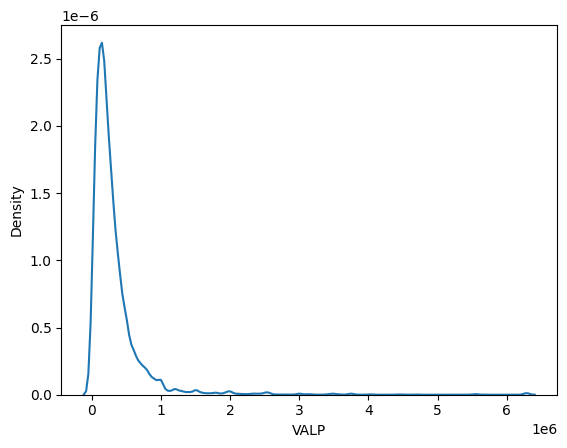

In [11]:
clean_valp = acs['VALP'].dropna()
sb.kdeplot(data = acs, x = clean_valp)

In [30]:
# Numerical Summary
valid_total_valp = acs['VALP'].count()

less_than_50k = acs[acs['VALP'] < 50000].mean()
less_than_100k = acs[acs['VALP'] < 100000].mean()
less_than_200k = acs[acs["VALP"] < 200000].mean()

print(f"Proportion < 50k: {less_than_50k}")
print(f"Proportion < 100k: {less_than_100k}")
print(f"Proportion < 200k: {less_than_200k}")

quantiles = acs['VALP'].quantile([0.1, 0.5, 0.75])

print("\nQuantiles (0.1, 0.5, 0.75):")
print(quantiles)




Proportion < 50k: DIVISION        5.000446
PUMA         3284.666319
REGION          2.592424
ST             28.743340
NP              2.151213
MRGP          374.464185
RNTP                 NaN
TEN             1.729189
VALP        23940.281292
VEH             1.748205
YBL             4.927593
FES             3.898954
FINCP       55789.382158
FPARC           3.329438
HHT             3.050634
HINCP       46393.867115
HUPAC           3.592409
MV              4.898580
NOC             0.292729
NPF             2.863265
NR              0.093478
NRC             0.380632
PARTNER         0.160532
R18             0.208340
R60             0.765160
R65             0.561937
TAXAMT        819.136627
WIF             1.227892
WKEXREL         7.940787
WORKSTAT        7.530327
FFINCP          0.238280
dtype: float64
Proportion < 100k: DIVISION        4.786537
PUMA         3207.632987
REGION          2.507079
ST             29.467633
NP              2.184418
MRGP          501.790823
RNTP                 Na

### Q1.d

Using the codebook, investigate the `"DIVISION"` column.

* What information is contained in this column?
* What kind of data is this (quantitative (continuous, discrete) or categorical (nominal, ordinal, binary)) ?
* Using the `replace` method for Series objects, replace the numbers in the `"DIVSION"` column with the names of the regions. Call this new column `"DIVISION_name"`.
* Produce a plot that shows the distribution of `"DIVISION_name"` or its key features.
* Calculate the distribution of the `"DIVISION_name"` column and print out the results.

In [32]:
# This column contains the division code for the household based on the 2010 consensus definitions and the codes represent specific clustered groups based on the states.


# categorical Nominal data - categorical because numbers serve as labels, nominal because the numbers 0-9 are just idenitifer labels


division_map = {
    0: "Puerto Rico",
    1: "New England",
    2: "Middle Atlantic",
    3: "East North Central",
    4: "West North Central",
    5: "South Atlantic",
    6: "East South Central",
    7: "West South Central",
    8: "Mountain",
    9: "Pacific"
}

acs["DIVISION_name"] = acs["DIVISION"].replace(division_map)



In [33]:
# Distribution
division_distribution = acs["DIVISION_name"].value_counts(normalize=True)
division_distribution

,proportion
DIVISION_name,
South Atlantic,0.206068
East North Central,0.149842
Pacific,0.144734
Middle Atlantic,0.128832
West South Central,0.116462
Mountain,0.075132
West North Central,0.069301
East South Central,0.061858
New England,0.047771


<Axes: xlabel='count', ylabel='DIVISION_name'>

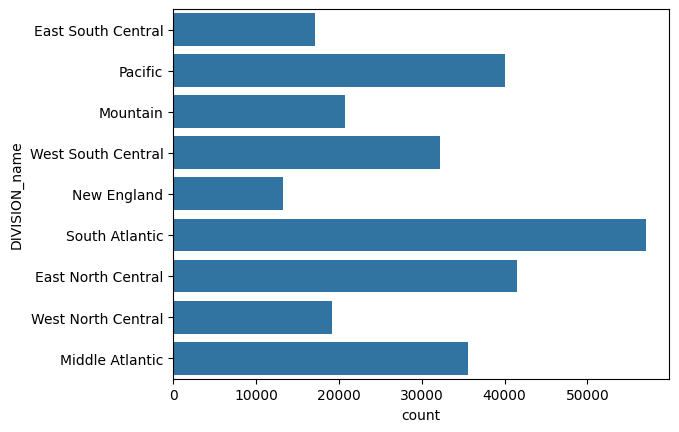

In [38]:
# Plotting the Distribution
sb.countplot(data = acs, y = "DIVISION_name")

## Part 2

### Q2.a

Review the `"ST"` column in the code book. We can see that the values for `"ST"` are numbers in the data set. Should we consider these to be *nominal* data? Why or why not?

### Q2.b

Below are two lists with the state codes and the state names listed in the code book for "ST".

Use these with the `replace` method for Series objects to get a new version of the `"ST"` column with nicer, easier to read names. Call this new column `"ST_name"`. Demonstrate your results by printing out the state name of the row at position 101,206 in the table.

In [15]:
st_nums = [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 72]
st_names = "Alabama/AL,Alaska/AK,Arizona/AZ,Arkansas/AR,California/CA,Colorado/CO,Connecticut/CT,Delaware/DE,District of Columbia/DC,Florida/FL,Georgia/GA,Hawaii/HI,Idaho/ID,Illinois/IL,Indiana/IN,Iowa/IA,Kansas/KS,Kentucky/KY,Louisiana/LA,Maine/ME,Maryland/MD,Massachusetts/MA,Michigan/MI,Minnesota/MN,Mississippi/MS,Missouri/MO,Montana/MT,Nebraska/NE,Nevada/NV,New Hampshire/NH,New Jersey/NJ,New Mexico/NM,New York/NY,North Carolina/NC,North Dakota/ND,Ohio/OH,Oklahoma/OK,Oregon/OR,Pennsylvania/PA,Rhode Island/RI,South Carolina/SC,South Dakota/SD,Tennessee/TN,Texas/TX,Utah/UT,Vermont/VT,Virginia/VA,Washington/WA,West Virginia/WV,Wisconsin/WI,Wyoming/WY,Puerto Rico/PRa".split(",")

In [44]:
# solution
state_map = dict(zip(st_nums, st_names))
acs["ST_name"] = acs["ST"].map(state_map)

print(acs.at[101206, "ST_name"])

Iowa/IA


### Q2.c

Create a table that is just the subset of the overall table that is the subset of households that are in Michigan. Demonstrate your results by printing out the number of rows this table.

In [60]:
michigan_table = acs[acs["ST_name"] == "Michigan/MI"]
print(f"Number of households in Michigan: {len(michigan_table)}")

Number of households in Michigan: 9330


In [61]:
ohio_table = acs[acs["ST_name"] == "Ohio/OH"]
print(f"Number of households in Ohio: {len(ohio_table)}")

Number of households in Ohio: 10466


Create a table for households in Ohio. Again show the number of rows.

### Q2.d

Plot the distribution of "HINCP" for Michigan:

<Axes: xlabel='HINCP', ylabel='Count'>

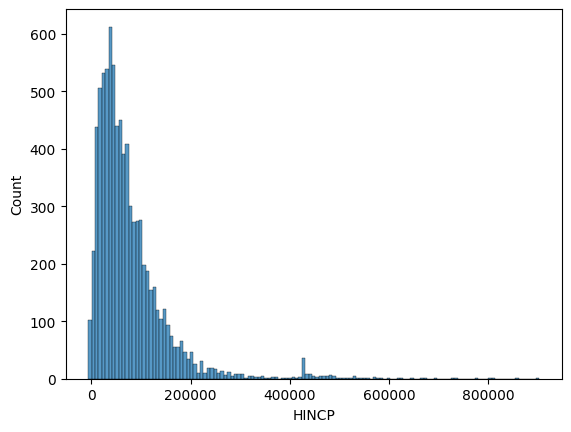

In [59]:
# solution
sb.histplot(data = michigan_table, x = "HINCP")

Repeat for Ohio:

<Axes: xlabel='HINCP', ylabel='Count'>

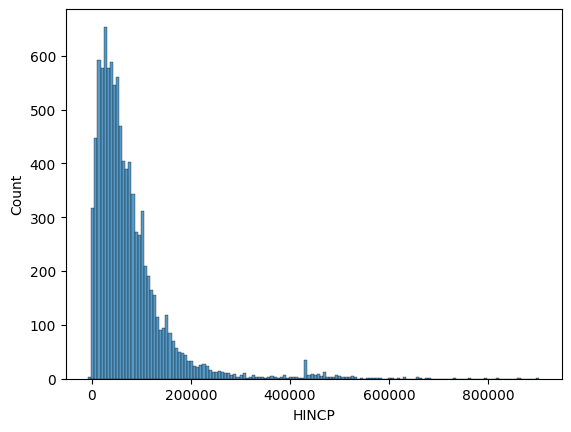

In [62]:
# solution
sb.histplot(data = ohio_table, x = "HINCP")

### Q2.e

Find the mean of the "HINCP" column for households in the state of Michigan. Find the mean for "HINCP" for Ohio households. Compute and print out the difference.

In [64]:
# solution
michigan_hincp_mean = michigan_table["HINCP"].mean()
michigan_hincp_mean

np.float64(77375.2441079497)

In [65]:
ohio_hincp_mean = ohio_table["HINCP"].mean()
ohio_hincp_mean

np.float64(76049.96143194173)

In [66]:
hincp_difference = michigan_hincp_mean - ohio_hincp_mean
hincp_difference

np.float64(1325.2826760079624)

Re-express the difference of means a proportion of the mean household income in Ohio and print out the result.

In [67]:
# solution
hincp_proportion = hincp_difference / ohio_hincp_mean
hincp_proportion

np.float64(0.017426474005433627)

### Q2.f

Find the interquartile range (IQR) of "HINCP" for Michigan and Ohio. Report the ratio of IQRs (Michigan/Ohio).

In [68]:
# solution
michigan_iqr = michigan_table["HINCP"].quantile(0.75) - michigan_table["HINCP"].quantile(0.25)
michigan_iqr

np.float64(68900.0)

In [70]:
ohio_iqr = ohio_table["HINCP"].quantile(0.75) - ohio_table["HINCP"].quantile(0.25)
ohio_iqr


np.float64(66700.0)

In [71]:
iqr_ratio = michigan_iqr / ohio_iqr
iqr_ratio

np.float64(1.0329835082458771)

## Part 3

### Q3.a

Look up the `RNTP` variable in the codebook. Answer the following:

- What does the `RNTP` column measure?
- What is the range of the values?
- Compute the proportion of rows in the `acs` table that are missing the `RNTP` variable.

In [23]:
# solution

### Q3.b

Create a table that has only rows with non-missing `RNTP` values. Show the number of rows.

In [24]:
# solution

### Q3.c

Compute the mean and standard deviation of the "RNTP" column in your new table.

### Q3.d

Perform a simulation in which you sample $n = 20$ subjects from the table created in Q3.b. In each sample, compute the sample mean. Use 10,000 replications.

* Plot the results of your simulation using an appropriate plot.
* Compute the mean the sample means from your simulation, print it out.
* Compute the standard deviation of the sample from you simulation, print it out.

In [25]:
#solution
n = 20

### Q3.e

Repeat Q3.d, but now use $n = 100$:

In [26]:
# solution

### Q3.f

For each of the simulations in Q3.e and Q3.f, compute the proportions of sample means that are within one standard deviation (of the simulated values).

In [27]:
# solution